# Adipurush Sentiment Analysis: Harnessing Machine Learning to Understand Twitter Buzz

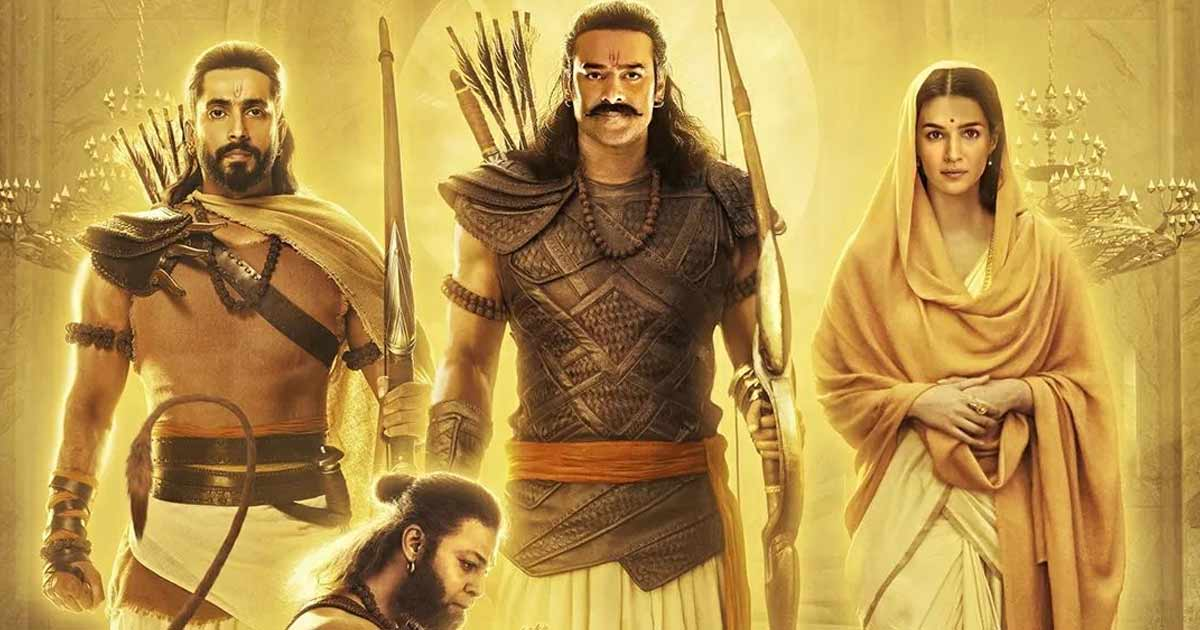

In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('adipurush_tweets.csv')

In [15]:
df

Date Created  Number of Likes  Source of Tweet   
0      2023-06-30 09:21:00+00:00                0              NaN  \
1      2023-06-30 09:20:57+00:00                0              NaN   
2      2023-06-30 09:20:22+00:00                0              NaN   
3      2023-06-30 09:20:00+00:00                3              NaN   
4      2023-06-30 09:15:22+00:00                3              NaN   
...                          ...              ...              ...   
9996   2023-06-23 10:08:50+00:00                0              NaN   
9997   2023-06-23 10:08:49+00:00                0              NaN   
9998   2023-06-23 10:08:17+00:00             3101              NaN   
9999   2023-06-23 10:08:01+00:00                0              NaN   
10000  2023-06-23 10:07:45+00:00                0              NaN   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10001 rows x 4 columns]

In [16]:
df.shape

(10001, 4)

In [17]:
df.columns

#preprocessing 

# 1->DROP duplicated COlumns
# 2->DROP Unrelated DATA
# 3->Removing stop words
# 4->Lematize the words
# 5->Removing unrelated words



Index(['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweets'], dtype='object')

In [18]:
df.duplicated().sum()

1

In [19]:
df = df.drop_duplicates()

In [20]:
df.isnull().sum()

Date Created           0
Number of Likes        0
Source of Tweet    10000
Tweets                 0
dtype: int64

In [21]:
df = df.drop('Source of Tweet', axis = 1)

In [22]:
df

Date Created  Number of Likes   
0      2023-06-30 09:21:00+00:00                0  \
1      2023-06-30 09:20:57+00:00                0   
2      2023-06-30 09:20:22+00:00                0   
3      2023-06-30 09:20:00+00:00                3   
4      2023-06-30 09:15:22+00:00                3   
...                          ...              ...   
9996   2023-06-23 10:08:50+00:00                0   
9997   2023-06-23 10:08:49+00:00                0   
9998   2023-06-23 10:08:17+00:00             3101   
9999   2023-06-23 10:08:01+00:00                0   
10000  2023-06-23 10:07:45+00:00                0   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10000 rows x 3 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     10000 non-null  object
 1   Number of Likes  10000 non-null  int64 
 2   Tweets           10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [24]:
df.describe()

Number of Likes
count     10000.000000
mean         73.544500
std         369.705682
min           0.000000
25%           0.000000
50%           1.000000
75%           9.000000
max       14778.000000

In [25]:
df.nunique()

Date Created       9831
Number of Likes     718
Tweets             9874
dtype: int64

In [26]:
df_sorted = df.sort_values(by='Number of Likes', ascending=False)

In [27]:
df_sorted.head(10)

Date Created  Number of Likes   
5036  2023-06-26 02:51:52+00:00            14778  \
2975  2023-06-27 12:35:31+00:00             8266   
8180  2023-06-24 09:10:09+00:00             8112   
3593  2023-06-27 02:23:37+00:00             7010   
6069  2023-06-25 07:20:59+00:00             5580   
3601  2023-06-27 01:59:03+00:00             5149   
4744  2023-06-26 06:20:58+00:00             4912   
4716  2023-06-26 06:30:01+00:00             4788   
5636  2023-06-25 13:08:17+00:00             4741   
1559  2023-06-28 14:40:47+00:00             4561   

                                                 Tweets  
5036  Pan India Star #Prabhas clearly said NO for #A...  
2975  #Breaking: Comments by Allahabad high court to...  
8180  #Adipurush #Prabhas #BhushanKumar https://t.co...  
3593  आदिपुरुष निर्माताओं को लगा एक और झटका, इलाहाबा...  
6069  👉#AdiPurush Telugu Version Hits 100CR SHARE💥💥💥...  
3601  #Adipurush WW BO\n\nZOOMS past ₹4⃣0⃣0⃣ cr.\n\n...  
4744  #Adipurush goes from strength to strength at t...  
4716  We are incredibly touched by the overwhelming ...  
5636  Witness the epic saga unfold!🏹 \nBook your tic...  
1559  कुरान पर गलत तथ्यों के साथ एक छोटी सी डॉक्यूमे...

In [28]:
df['Date Created'] = pd.to_datetime(df['Date Created'])

In [29]:
df

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10000 rows x 3 columns]

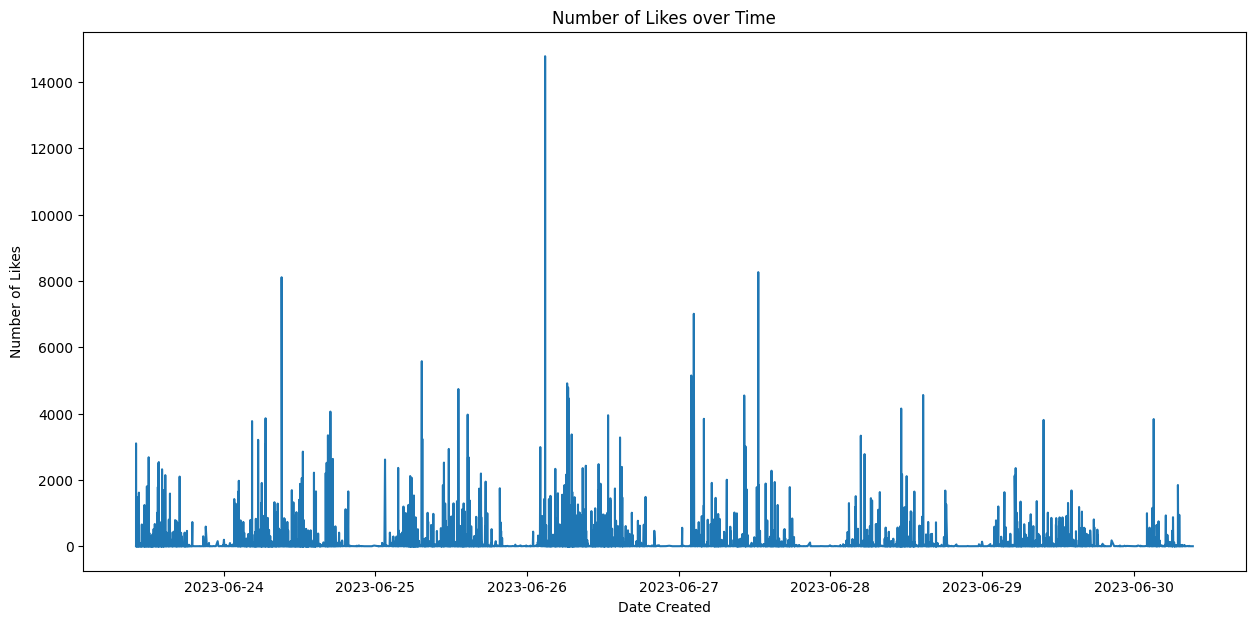

In [30]:
df_sorted_date = df.sort_values('Date Created')
plt.figure(figsize=[15,7])
plt.plot(df_sorted_date['Date Created'], df_sorted_date['Number of Likes'])
plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

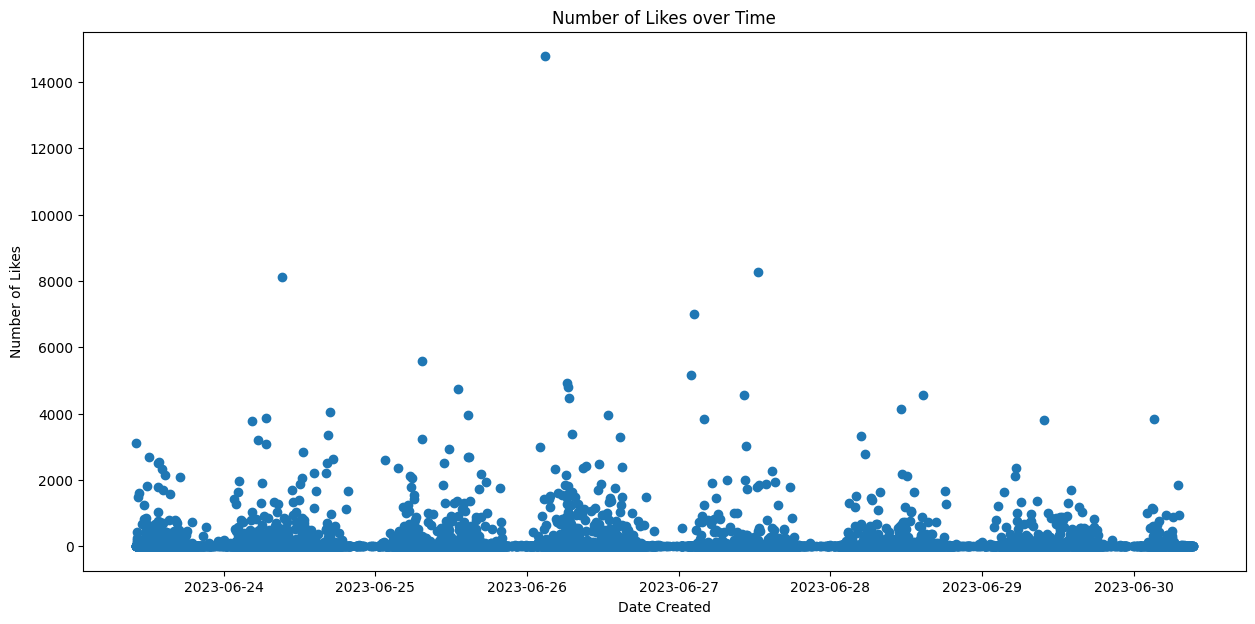

In [31]:
plt.figure(figsize=[15,7],)
plt.scatter(df_sorted_date['Date Created'], df_sorted_date['Number of Likes'])
plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

In [32]:
import plotly.express as px

fig = px.scatter(df_sorted_date, x='Date Created', y='Number of Likes', title='Number of Likes over Time')
fig.update_layout(xaxis=dict(title='Date Created'), yaxis=dict(title='Number of Likes'))
fig.show()

In [33]:
import re
import string
from tqdm.notebook import tqdm
from datetime import datetime
import dateutil.parser

In [34]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [35]:

from nltk.corpus import stopwords


In [36]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
languages = stopwords.fileids()

# Print the number of supported languages
print("Number of supported languages:", len(languages))

# Print the list of supported languages
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [38]:
from nltk.tokenize import TweetTokenizer

In [39]:
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

In [40]:
def clean_tweet(tweet):
    # Remove URLs, hashtags, mentions, and special characters
    tweet = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", tweet)

    #its remove all non alpha numeric characters
    tweet = re.sub(r"[^\w\s]", "", tweet)

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(tweet)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet

In [41]:
df['Cleaned_Tweets'] = df['Tweets'].apply(clean_tweet)

In [42]:
df

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets  
0      womens ashes 2023 live streaming broadcast tv ...  
1                                    playing book ticket  
2                                                         
3      adipurush vs 72 hoorain vs kerala story contro...  
4                                                     st  
...                                                  ...  
9996   adipurush 1st week ww box office collections ఆ...  
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[10000 rows x 4 columns]

In [43]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [44]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: clean_text(x))

In [45]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [46]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: tokenization(x))

In [47]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [48]:
#nltk.download('wordnet')

In [49]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [50]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [51]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: lemmatizer(x))

In [52]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [53]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits(x))

In [54]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) 
    return(clean_text)

In [55]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: remove_digits1(x))

In [56]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['Cleaned_Tweets'].apply(detect_language)

In [57]:
df

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  
0      womens ashes live streaming broadcast tv chann...       en  
1                                    playing book ticket       en  
2                                                            None  
3      adipurush vs hoorain vs kerala story controver...       en  
4                                                     st       sv  
...                                                  ...      ...  
9996   adipurush 1st week ww box office collections ఆ...       en  
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...       hi  
9998   empowering lyrics elevate spirit envelop world...       en  
9999   choosing service product beneficial opt authen...       en  
10000  film greatest epic earn boc worth budget shame...       en  

[10000 rows x 5 columns]

In [58]:
df1 = df.copy()

In [59]:
df1['english_tweets'] = df[df['Language'] == 'en']['Cleaned_Tweets']

In [60]:
df1

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language   
0      womens ashes live streaming broadcast tv chann...       en  \
1                                    playing book ticket       en   
2                                                            None   
3      adipurush vs hoorain vs kerala story controver...       en   
4                                                     st       sv   
...                                                  ...      ...   
9996   adipurush 1st week ww box office collections ఆ...       en   
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...       hi   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
2                                                    NaN  
3      adipurush vs hoorain vs kerala story controver...  
4                                                    NaN  
...                                                  ...  
9996   adipurush 1st week ww box office collections ఆ...  
9997                                                 NaN  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[10000 rows x 6 columns]

In [61]:
df1 = df1.dropna()

In [62]:
df1

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
5     2023-06-30 09:08:27+00:00                1   
8     2023-06-30 09:04:09+00:00                0   
...                         ...              ...   
9995  2023-06-23 10:09:41+00:00                1   
9996  2023-06-23 10:08:50+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5      This is how the story should be told. @omraut ...   
8      @VikasAgarwalll Milord says: If my compatriots...   
...                                                  ...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language   
0      womens ashes live streaming broadcast tv chann...       en  \
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
5      story told learn hotstar india graphic india g...       en   
8      milord compatriots backstab ie end exposing fa...       en   
...                                                  ...      ...   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9996   adipurush 1st week ww box office collections ఆ...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
3      adipurush vs hoorain vs kerala story controver...  
5      story told learn hotstar india graphic india g...  
8      milord compatriots backstab ie end exposing fa...  
...                                                  ...  
9995   rangarajan garu poojari chilkur balaji appreci...  
9996   adipurush 1st week ww box office collections ఆ...  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[5103 rows x 6 columns]

In [63]:
df1

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
5     2023-06-30 09:08:27+00:00                1   
8     2023-06-30 09:04:09+00:00                0   
...                         ...              ...   
9995  2023-06-23 10:09:41+00:00                1   
9996  2023-06-23 10:08:50+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5      This is how the story should be told. @omraut ...   
8      @VikasAgarwalll Milord says: If my compatriots...   
...                                                  ...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language   
0      womens ashes live streaming broadcast tv chann...       en  \
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
5      story told learn hotstar india graphic india g...       en   
8      milord compatriots backstab ie end exposing fa...       en   
...                                                  ...      ...   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9996   adipurush 1st week ww box office collections ఆ...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
3      adipurush vs hoorain vs kerala story controver...  
5      story told learn hotstar india graphic india g...  
8      milord compatriots backstab ie end exposing fa...  
...                                                  ...  
9995   rangarajan garu poojari chilkur balaji appreci...  
9996   adipurush 1st week ww box office collections ఆ...  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[5103 rows x 6 columns]

In [64]:
df1.nunique()

Date Created       5066
Number of Likes     563
Tweets             5057
Cleaned_Tweets     4472
Language              1
english_tweets     4472
dtype: int64

In [65]:
df1['Tweet_Length'] = df1['english_tweets'].str.len()

ValueError: Could not interpret input 'Day'

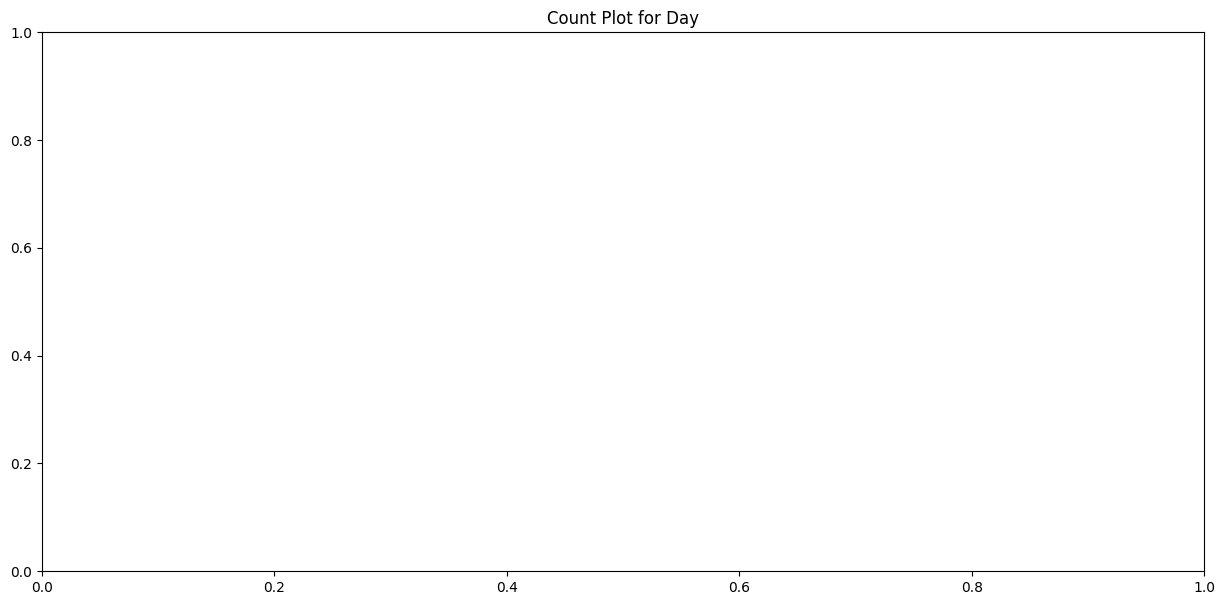

In [66]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for Day')
sns.countplot(x = 'Day', data = df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [67]:
plt.figure(figsize=(15, 6))
counts = df1['Day'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Day')
plt.show()

KeyError: 'Day'

<Figure size 1500x600 with 0 Axes>

In [68]:
import plotly.graph_objects as go

In [69]:
fig = go.Figure(data=[go.Bar(x=df1['Day'].value_counts().index, y=df1['Day'].value_counts())])
fig.update_layout(
        title= 'Day',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

KeyError: 'Day'

In [70]:
counts = df1['Day'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Day')
fig.show()

KeyError: 'Day'

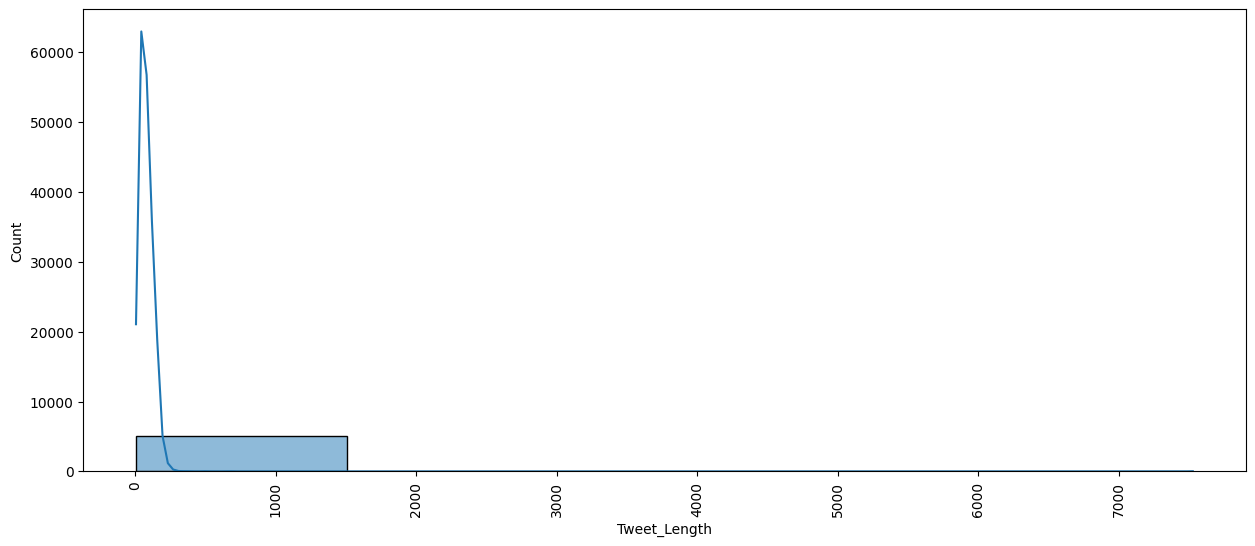

In [71]:
plt.figure(figsize=(15,6))
sns.histplot(df1['Tweet_Length'], kde = True, bins = 5, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

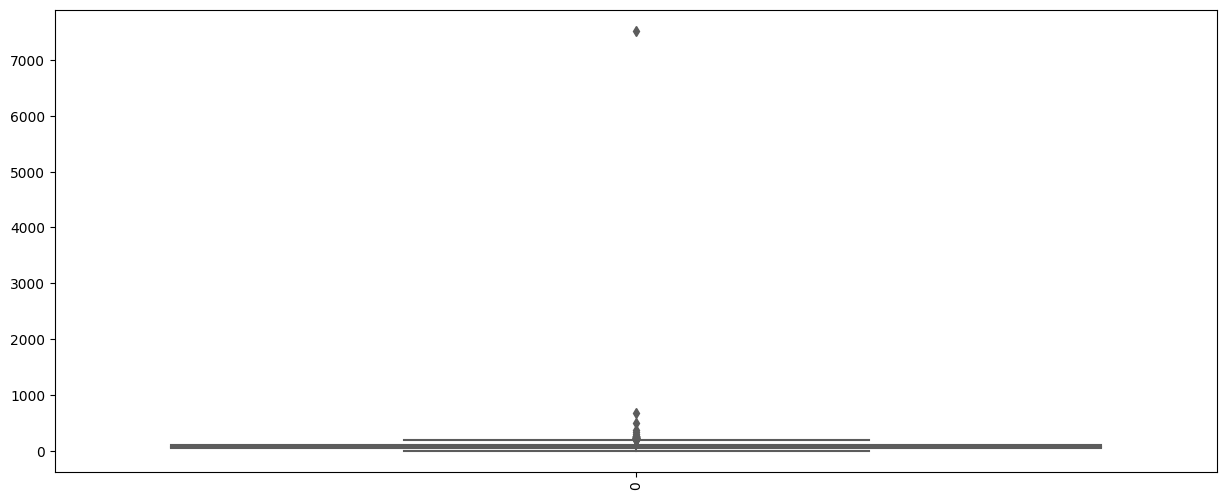

In [72]:
plt.figure(figsize=(15,6))
sns.boxplot(df1['Tweet_Length'], palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [73]:
import plotly.express as px

fig = px.histogram(df1, x='Tweet_Length', nbins=20, histnorm='probability density')
fig.update_layout(title=f"Histogram of Tweet Length", xaxis_title='Tweet Length', yaxis_title="Probability Density")
fig.show()

In [74]:
fig = px.box(df1, y='Tweet_Length')
fig.update_layout(title=f"Box Plot of Tweet Length", yaxis_title='Tweet_Length')
fig.show()

In [75]:
spell = SpellChecker() 

In [76]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [111]:




sia = SIA()   #Valence Aware Dictionary and sEntiment 
#some others
#TEXTBLOB,IBM WATSON, STANFORD CORENLp


text = "amazing"
result=sia.polarity_scores(text)
print(result)

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}


In [112]:
from textblob import TextBlob

def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the sentiment polarity
    sentiment = blob.sentiment.polarity
    print(sentiment)
    # Classify the sentiment
    if sentiment > 0.35:
        return "positive"
    elif sentiment < -0.05:
        return "negative"
    else:
        return "neutral"

# Example text for analysis
text = "amazing"

# Perform sentiment analysis
result = analyze_sentiment(text)
print(f"Sentiment of the text '{text}' is: {result}")


0.6000000000000001
Sentiment of the text 'amazing' is: positive


In [125]:
#bert= Bidirectional Encoder Representations from Transformers


from transformers import pipeline

# Load pre-trained model for sentiment analysis
sentiment_analysis = pipeline("sentiment-analysis")

# Sample text for sentiment analysis
text = "critic"

# Perform sentiment analysis using BERT
result = sentiment_analysis(text)

# Extract sentiment label and score from the result
sentiment_label = result[0]['label']
sentiment_score = result[0]['score']

print(f"The sentiment of the text '{text}' is: {sentiment_label} with a confidence score of {sentiment_score}")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


The sentiment of the text 'critic' is: NEGATIVE with a confidence score of 0.9214231967926025


In [129]:
from flair.models import TextClassifier
from flair.data import Sentence

# Load pre-trained model for sentiment analysis
classifier = TextClassifier.load('en-sentiment')

# Sample text for sentiment analysis
text = "critic"

# Create a Flair Sentence
sentence = Sentence(text)

# Predict sentiment using the loaded model
classifier.predict(sentence)

# Get the predicted sentiment label
sentiment_label = sentence.labels[0].value
sentiment_score = sentence.labels[0].score

print(f"The sentiment of the text '{text}' is: {sentiment_label} with a confidence score of {sentiment_score}")


The sentiment of the text 'critic' is: POSITIVE with a confidence score of 0.5590447187423706


In [128]:
'''The choice of the best tool or model for sentiment analysis depends on various factors and the specific requirements of your project. Each tool or model has its own strengths and limitations:

1. **NLTK's SentimentIntensityAnalyzer and TextBlob:**
   - **Pros:** Easy to use, particularly for simple sentiment analysis tasks. TextBlob provides a high-level API and SentimentIntensityAnalyzer works well for basic sentiment analysis in English text.
   - **Cons:** Limited in handling complex contexts, idiomatic expressions, and might not perform optimally in domains or languages other than English.

2. **BERT:**
   - **Pros:** BERT is a state-of-the-art transformer-based model, providing highly accurate results when fine-tuned for sentiment analysis tasks.
   - **Cons:** BERT is computationally expensive and might require more resources, especially in terms of processing power and memory. Fine-tuning might be necessary for specific domains.

3. **Flair:**
   - **Pros:** Flair provides various pre-trained models, including sentiment analysis models, and offers a more high-level API, which is easier to use compared to directly working with BERT.
   - **Cons:** Similar to BERT, it may need fine-tuning for domain-specific applications, and the resource requirements could be relatively high compared to simpler models.

The choice between these models or libraries depends on your project requirements:

- **For simplicity and ease of use**, if you need a quick sentiment analysis in English text and don't have complex requirements, TextBlob or SentimentIntensityAnalyzer might be sufficient.
- **For high accuracy** and if you can handle the computational demands, BERT is a strong choice, especially when fine-tuned for your specific use case.
- **For a balance between accuracy and ease of use**, Flair provides pre-trained models and an easier interface compared to directly working with BERT.

Consider factors such as the complexity of your task, available computational resources, the need for accuracy, and whether you're working in English or another language when deciding which tool or model to use for sentiment analysis.'''

"The choice of the best tool or model for sentiment analysis depends on various factors and the specific requirements of your project. Each tool or model has its own strengths and limitations:\n\n1. **NLTK's SentimentIntensityAnalyzer and TextBlob:**\n   - **Pros:** Easy to use, particularly for simple sentiment analysis tasks. TextBlob provides a high-level API and SentimentIntensityAnalyzer works well for basic sentiment analysis in English text.\n   - **Cons:** Limited in handling complex contexts, idiomatic expressions, and might not perform optimally in domains or languages other than English.\n\n2. **BERT:**\n   - **Pros:** BERT is a state-of-the-art transformer-based model, providing highly accurate results when fine-tuned for sentiment analysis tasks.\n   - **Cons:** BERT is computationally expensive and might require more resources, especially in terms of processing power and memory. Fine-tuning might be necessary for specific domains.\n\n3. **Flair:**\n   - **Pros:** Flair pr

In [113]:
df1.head(3)

Date Created  Number of Likes   
0 2023-06-30 09:21:00+00:00                0  \
1 2023-06-30 09:20:57+00:00                0   
3 2023-06-30 09:20:00+00:00                3   

                                              Tweets   
0  #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1  Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3  Adipurush VS 72 Hoorain VS The Kerala Story Co...   

                                      Cleaned_Tweets Language   
0  womens ashes live streaming broadcast tv chann...       en  \
1                                playing book ticket       en   
3  adipurush vs hoorain vs kerala story controver...       en   

                                      english_tweets  Tweet_Length   
0  womens ashes live streaming broadcast tv chann...            64  \
1                                playing book ticket            19   
3  adipurush vs hoorain vs kerala story controver...            55   

  new_sentiment_textblob  sentiment overall_sentiment  
0               positive     0.0000           neutral  
1                neutral     0.2023           neutral  
3                neutral     0.0000           neutral

In [80]:
df1['new_sentiment_textblob']= df1['english_tweets'].apply(analyze_sentiment)

In [114]:
df1['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df1['english_tweets'])]
df1['overall_sentiment'] = df1['sentiment'].apply(label_sentiment)

  0%|          | 0/5103 [00:00<?, ?it/s]

In [115]:
df1

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
5     2023-06-30 09:08:27+00:00                1   
8     2023-06-30 09:04:09+00:00                0   
...                         ...              ...   
9995  2023-06-23 10:09:41+00:00                1   
9996  2023-06-23 10:08:50+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5      This is how the story should be told. @omraut ...   
8      @VikasAgarwalll Milord says: If my compatriots...   
...                                                  ...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language   
0      womens ashes live streaming broadcast tv chann...       en  \
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
5      story told learn hotstar india graphic india g...       en   
8      milord compatriots backstab ie end exposing fa...       en   
...                                                  ...      ...   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9996   adipurush 1st week ww box office collections ఆ...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  Tweet_Length   
0      womens ashes live streaming broadcast tv chann...            64  \
1                                    playing book ticket            19   
3      adipurush vs hoorain vs kerala story controver...            55   
5      story told learn hotstar india graphic india g...           114   
8      milord compatriots backstab ie end exposing fa...           117   
...                                                  ...           ...   
9995   rangarajan garu poojari chilkur balaji appreci...           153   
9996   adipurush 1st week ww box office collections ఆ...            89   
9998   empowering lyrics elevate spirit envelop world...           116   
9999   choosing service product beneficial opt authen...           103   
10000  film greatest epic earn boc worth budget shame...           143   

      new_sentiment_textblob  sentiment overall_sentiment  
0                   positive     0.0000           neutral  
1                    neutral     0.2023           neutral  
3                    neutral     0.0000           neutral  
5                    neutral     0.0000           neutral  
8                    neutral     0.4767          positive  
...                      ...        ...               ...  
9995                 neutral     0.7506          positive  
9996                 neutral     0.0000           neutral  
9998                 neutral     0.7845          positive  
9999                positive     0.9274          positive  
10000               positive     0.4404          positive  

[5103 rows x 10 columns]

In [116]:
count = (df1['new_sentiment_textblob'] == df1['overall_sentiment']).sum()
print(count)
count = (df1['new_sentiment_textblob'] != df1['overall_sentiment']).sum()
print(count)

2854
2249


In [117]:
df1['overall_sentiment'].unique()
df1['new_sentiment_textblob'].unique()



array(['positive', 'neutral', 'negative'], dtype=object)

In [118]:
print(df1['overall_sentiment'].value_counts())
print(df1['new_sentiment_textblob'].value_counts())

overall_sentiment
neutral     1973
negative    1793
positive    1337
Name: count, dtype: int64
new_sentiment_textblob
neutral     2462
positive    1736
negative     905
Name: count, dtype: int64


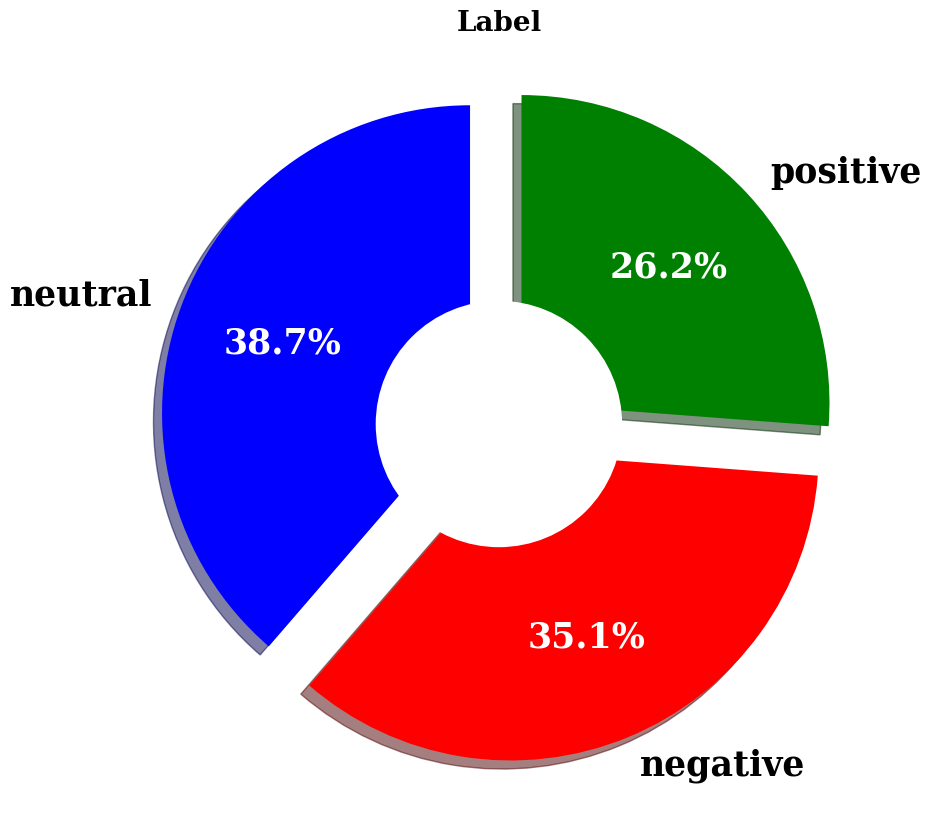

In [119]:
label_data = df1['overall_sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

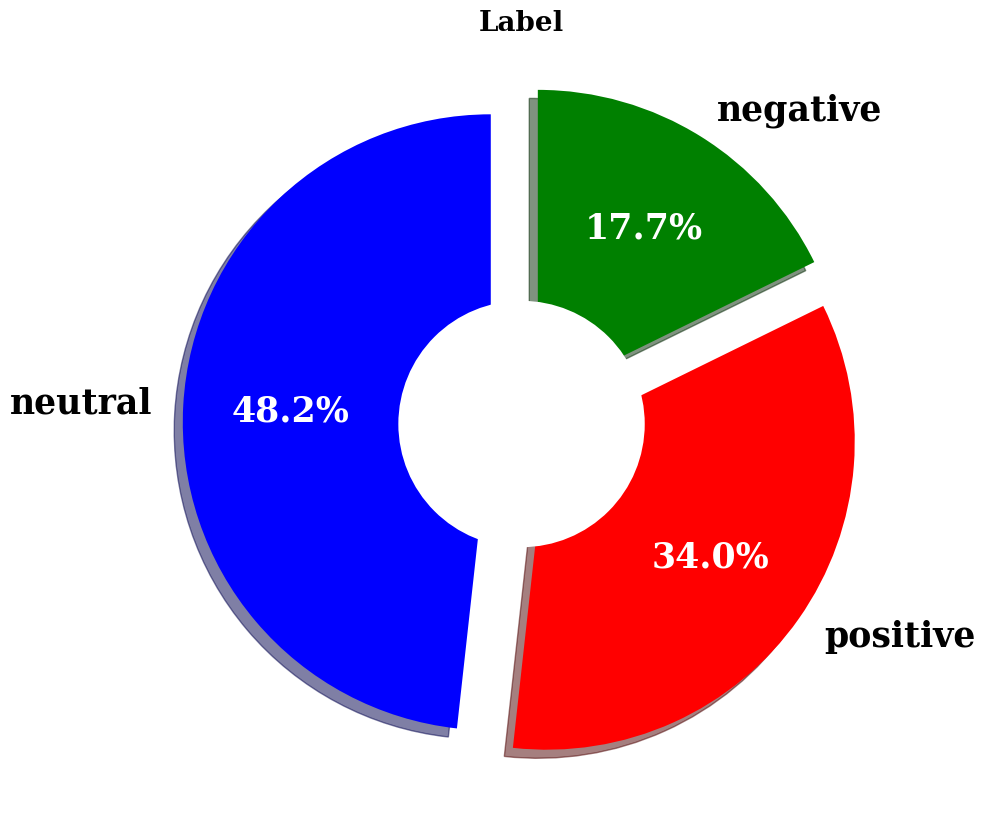

In [120]:
label_data = df1['new_sentiment_textblob'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df1['overall_sentiment'].value_counts().index, y=df1['overall_sentiment'].value_counts())])
fig.update_layout(
        title= 'Overall Sentiment',
        xaxis_title="Categories",
        yaxis_title="Count"
    )
fig.show()

NameError: name 'go' is not defined

In [ ]:
counts = df1['overall_sentiment'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Overall Sentiment')
fig.show()

NameError: name 'go' is not defined

In [ ]:
df1

Date Created  Number of Likes   
0     2023-06-30 09:21:00+00:00                0  \
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
5     2023-06-30 09:08:27+00:00                1   
8     2023-06-30 09:04:09+00:00                0   
...                         ...              ...   
9994  2023-06-23 10:10:47+00:00                1   
9995  2023-06-23 10:09:41+00:00                1   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets   
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  \
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
5      This is how the story should be told. @omraut ...   
8      @VikasAgarwalll Milord says: If my compatriots...   
...                                                  ...   
9994   Let the empowering lyrics of #Shivoham elevate...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language   
0      womens ashes live streaming broadcast tv chann...       en  \
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
5      story told learn hotstar india graphic india g...       en   
8      milord compatriots backstab ie end exposing fa...       en   
...                                                  ...      ...   
9994   empowering lyrics elevate spirit envelop world...       en   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  Year  Month  Day   
0      womens ashes live streaming broadcast tv chann...  2023      6   30  \
1                                    playing book ticket  2023      6   30   
3      adipurush vs hoorain vs kerala story controver...  2023      6   30   
5      story told learn hotstar india graphic india g...  2023      6   30   
8      milord compatriots backstab ie end exposing fa...  2023      6   30   
...                                                  ...   ...    ...  ...   
9994   empowering lyrics elevate spirit envelop world...  2023      6   23   
9995   rangarajan garu poojari chilkur balaji appreci...  2023      6   23   
9998   empowering lyrics elevate spirit envelop world...  2023      6   23   
9999   choosing service product beneficial opt authen...  2023      6   23   
10000  film greatest epic earn boc worth budget shame...  2023      6   23   

           Time  Tweet_Length  sentiment overall_sentiment  
0      09:21:00            64     0.0000           neutral  
1      09:20:57            19     0.2023           neutral  
3      09:20:00            55     0.0000           neutral  
5      09:08:27           114     0.0000           neutral  
8      09:04:09           117     0.4767          positive  
...         ...           ...        ...               ...  
9994   10:10:47            78     0.7845          positive  
9995   10:09:41           153     0.7506          positive  
9998   10:08:17           116     0.7845          positive  
9999   10:08:01           103     0.9274          positive  
10000  10:07:45           143     0.4404          positive  

[5102 rows x 13 columns]

In [ ]:
df2 = df1[['english_tweets', 'overall_sentiment']]

In [ ]:
df2

english_tweets overall_sentiment
0      womens ashes live streaming broadcast tv chann...           neutral
1                                    playing book ticket           neutral
3      adipurush vs hoorain vs kerala story controver...           neutral
5      story told learn hotstar india graphic india g...           neutral
8      milord compatriots backstab ie end exposing fa...          positive
...                                                  ...               ...
9995   rangarajan garu poojari chilkur balaji appreci...          positive
9996   adipurush 1st week ww box office collections ఆ...           neutral
9998   empowering lyrics elevate spirit envelop world...          positive
9999   choosing service product beneficial opt authen...          positive
10000  film greatest epic earn boc worth budget shame...          positive

[5100 rows x 2 columns]

In [ ]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove extra white spaces
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    # Split the text into words
    words = cleaned_text.split()
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the clean_text function to the 'english_tweets' column
df2['Cleaned_English_Tweets'] = df2['english_tweets'].apply(clean_text)

In [ ]:
df2

english_tweets overall_sentiment   
0      womens ashes live streaming broadcast tv chann...           neutral  \
1                                    playing book ticket           neutral   
3      adipurush vs hoorain vs kerala story controver...           neutral   
5      story told learn hotstar india graphic india g...           neutral   
8      milord compatriots backstab ie end exposing fa...          positive   
...                                                  ...               ...   
9995   rangarajan garu poojari chilkur balaji appreci...          positive   
9996   adipurush 1st week ww box office collections ఆ...           neutral   
9998   empowering lyrics elevate spirit envelop world...          positive   
9999   choosing service product beneficial opt authen...          positive   
10000  film greatest epic earn boc worth budget shame...          positive   

                                  Cleaned_English_Tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
3      adipurush vs hoorain vs kerala story controver...  
5      story told learn hotstar india graphic india g...  
8      milord compatriots backstab ie end exposing fa...  
...                                                  ...  
9995   rangarajan garu poojari chilkur balaji appreci...  
9996      adipurush st week ww box office collections st  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[5100 rows x 3 columns]

In [ ]:
df3 = df2[['Cleaned_English_Tweets', 'overall_sentiment']]

In [ ]:
df3

Cleaned_English_Tweets overall_sentiment
0      womens ashes live streaming broadcast tv chann...           neutral
1                                    playing book ticket           neutral
3      adipurush vs hoorain vs kerala story controver...           neutral
5      story told learn hotstar india graphic india g...           neutral
8      milord compatriots backstab ie end exposing fa...          positive
...                                                  ...               ...
9995   rangarajan garu poojari chilkur balaji appreci...          positive
9996      adipurush st week ww box office collections st           neutral
9998   empowering lyrics elevate spirit envelop world...          positive
9999   choosing service product beneficial opt authen...          positive
10000  film greatest epic earn boc worth budget shame...          positive

[5100 rows x 2 columns]

In [ ]:
non_meaningful_words = ['cr', 'rs']

def remove_non_meaningful_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in non_meaningful_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df3['Cleaned_English_Tweets'] = df3['Cleaned_English_Tweets'].apply(remove_non_meaningful_words)

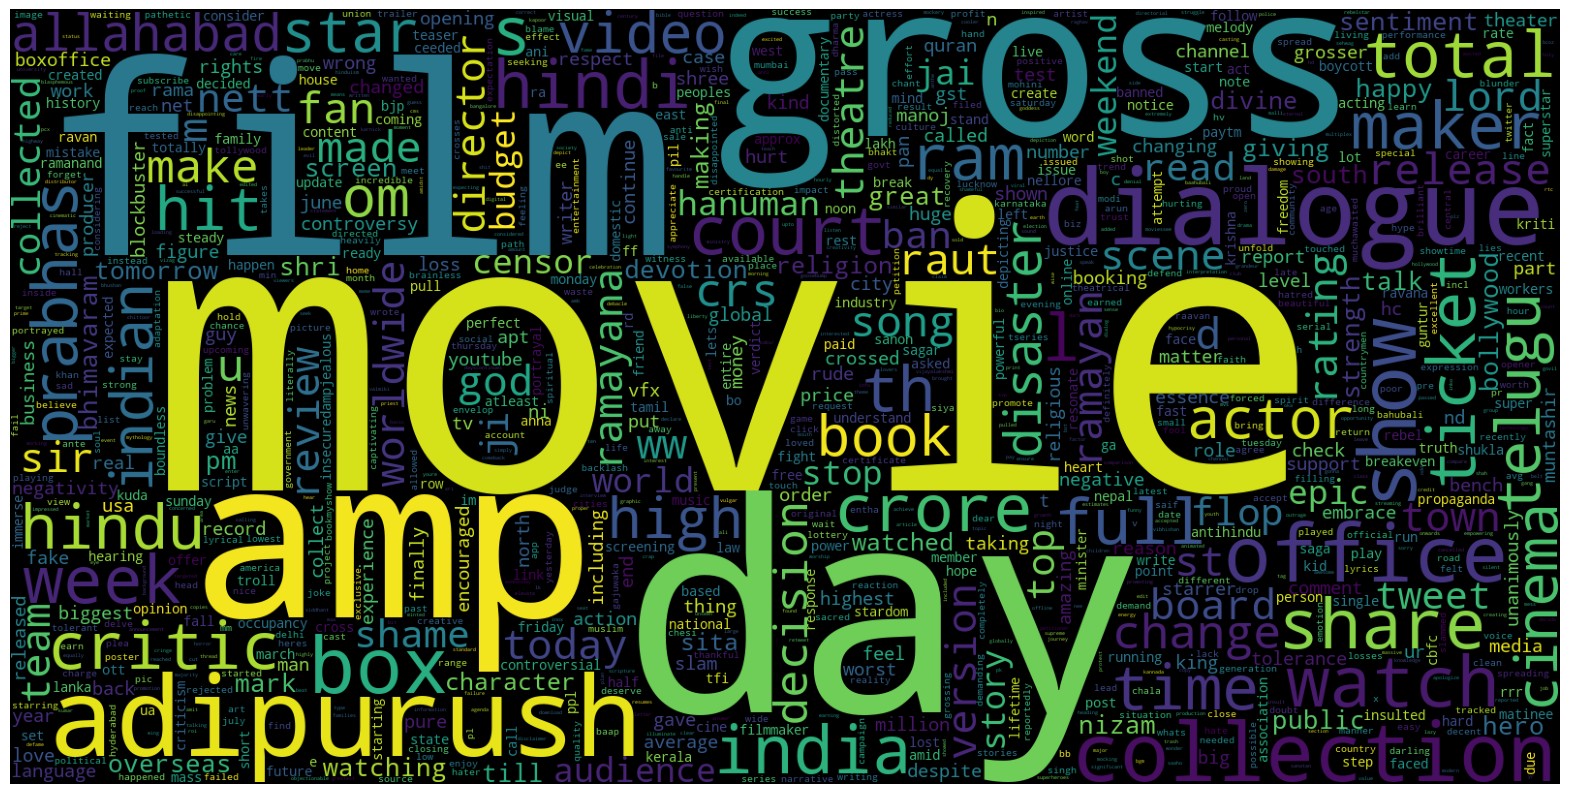

In [ ]:
from wordcloud import WordCloud
data = df3['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

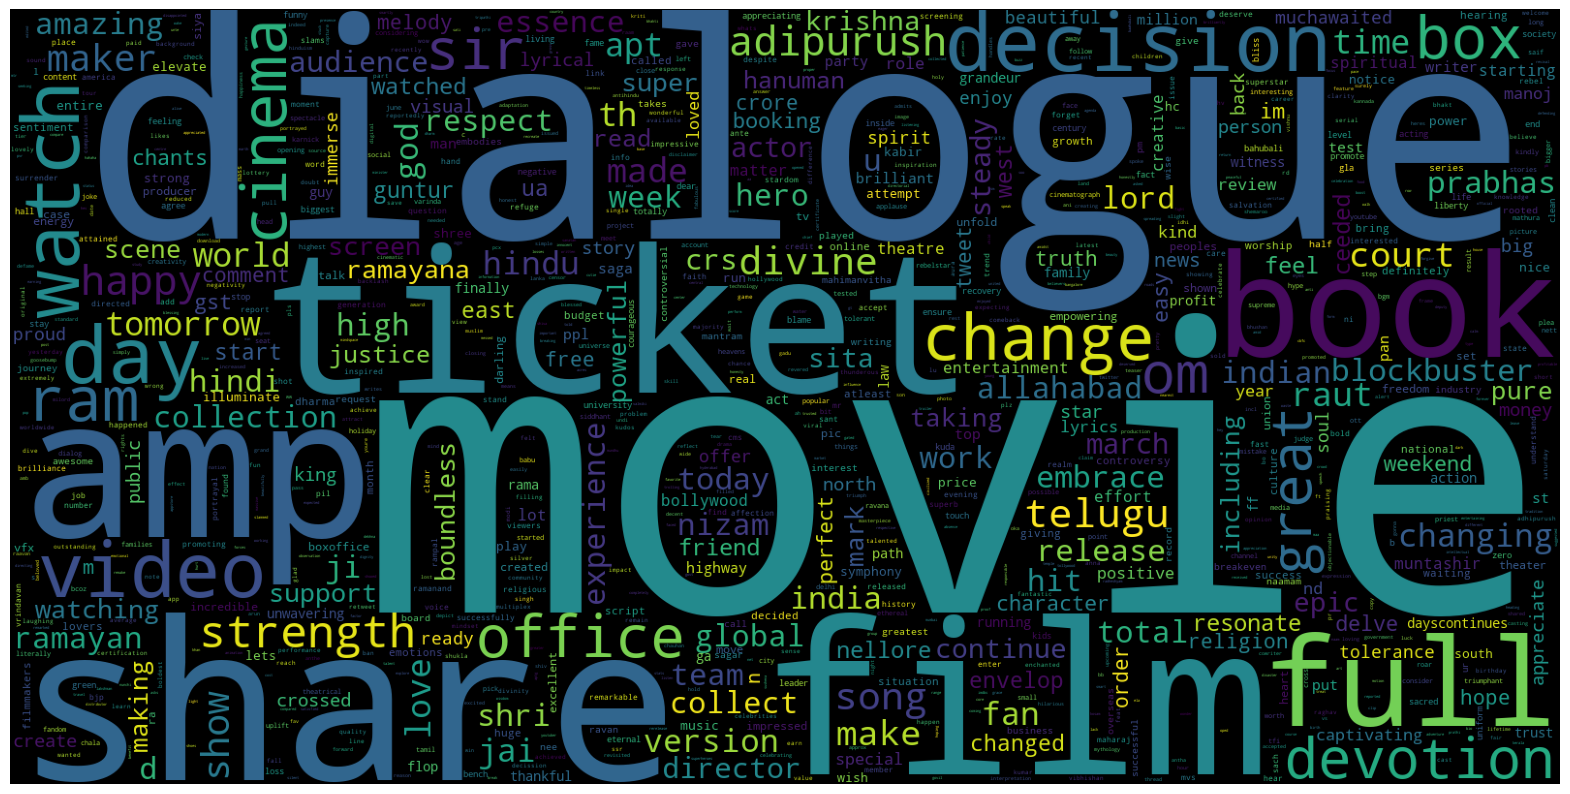

In [ ]:
data = df3[df3['overall_sentiment']=="positive"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "positive"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Positive Tweets", width=800, height=600)
fig.show()

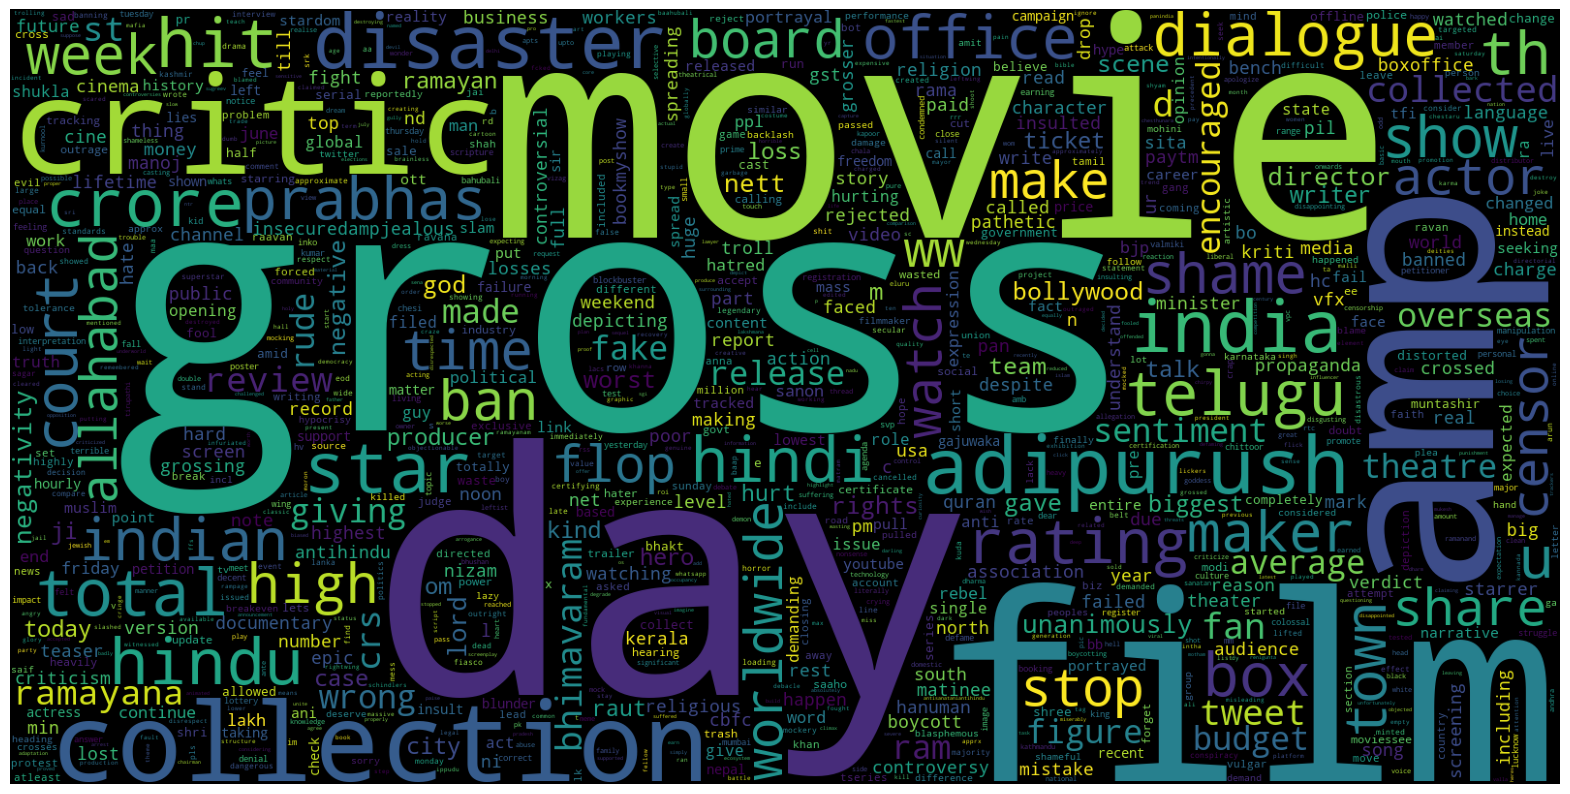

In [ ]:
data = df3[df3['overall_sentiment']=="negative"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

from PIL import Image
import numpy as np
data = df3[df3['overall_sentiment'] == "negative"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Negative Tweets", width=800, height=600)
fig.show()

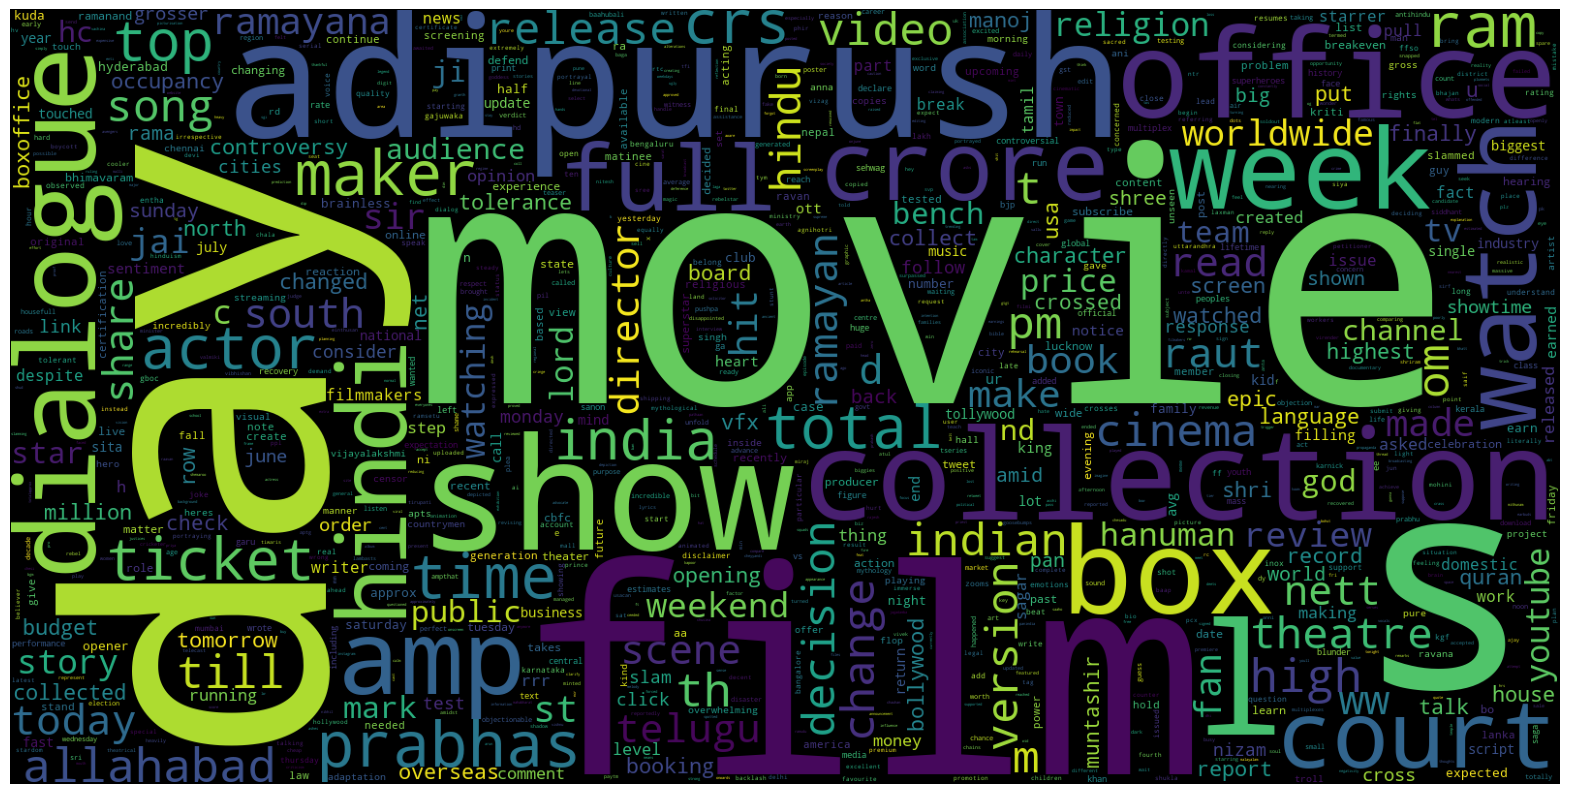

In [ ]:
data = df3[df3['overall_sentiment']=="neutral"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

import numpy as np
data = df3[df3['overall_sentiment'] == "neutral"]['Cleaned_English_Tweets']
text = " ".join(data)
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text)
image = wordcloud.to_image()
image_array = np.array(image)
fig = go.Figure(data=go.Image(z=image_array))
fig.update_layout(title_text="Word Cloud - Neutral Tweets", width=800, height=600)
fig.show()